## **EDA**

### **Libraries**

In [48]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

### **Import Dataset**

In [2]:
file_path = "C:\\Users\\ynk615\\OneDrive - Corteva\\Documentos\\dataprojects\\pk1_online_retail_sales\\data\\raw\\online_retail.csv" 

df = pd.read_csv(file_path)
df.head(10)

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


### **Simple Analysis**

In [3]:
# schema and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


In [3]:
# basic stats 
df.describe()

,index,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,541909.000000,406829.000000
mean,270954.000000,9.552250,4.611114,15287.690570
std,156435.797851,218.081158,96.759853,1713.600303
min,0.000000,-80995.000000,-11062.060000,12346.000000
25%,135477.000000,1.000000,1.250000,13953.000000
50%,270954.000000,3.000000,2.080000,15152.000000
75%,406431.000000,10.000000,4.130000,16791.000000
max,541908.000000,80995.000000,38970.000000,18287.000000


In [8]:
# NA Values & Nulls
na_values = df.isna().sum()
print('Count of NA Values: \n\n', na_values)
nulls = df.isnull().sum()
print('\n Count of Nulls: \n\n', nulls)


Count of NA Values: 

 index               0
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

 Count of Nulls: 

 index               0
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [ ]:
# Define numeric columns
numeric_cols = ["UnitPrice", "Quantity"]
print("Numeric Columns:", numeric_cols)


Numeric Columns: ['UnitPrice', 'Quantity']


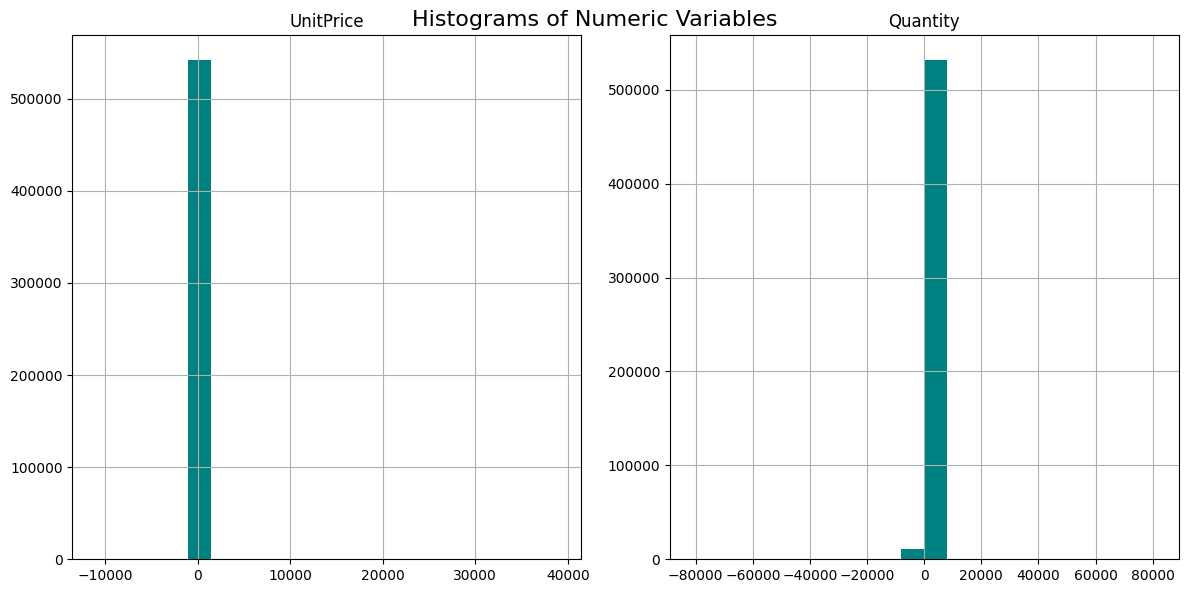

In [24]:
# Plot Histograms for numeric variables

df[numeric_cols].hist(bins=20, color='teal',figsize=(12,6))
plt.tight_layout()
plt.suptitle('Histograms of Numeric Variables', fontsize=16)
plt.show()


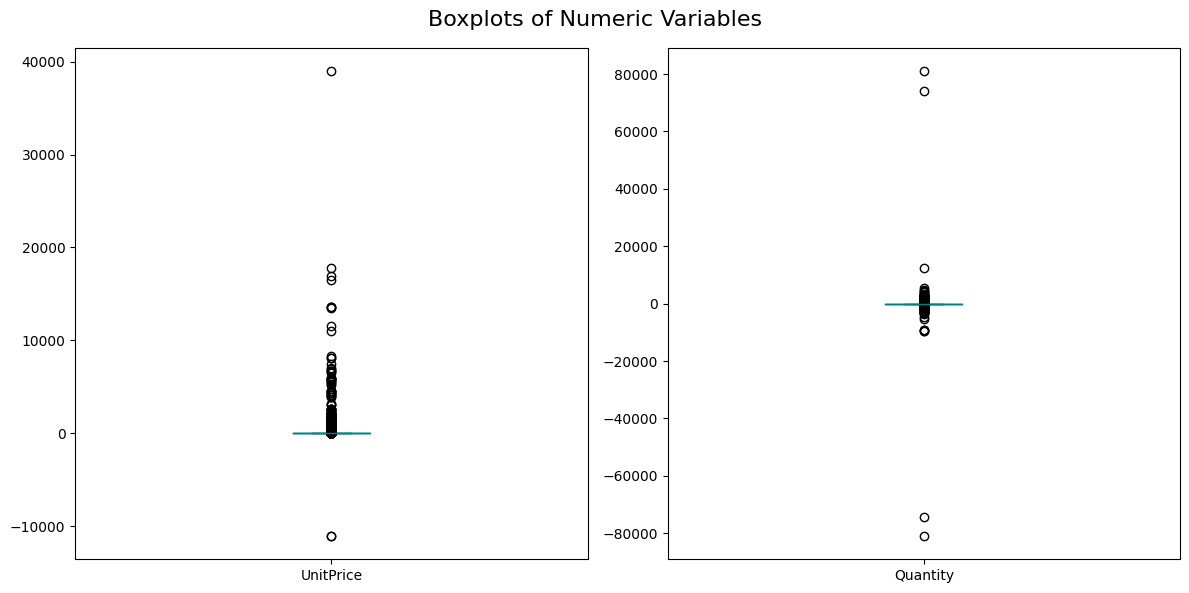

In [34]:
# Boxpltos for numeric variables
df[numeric_cols].plot(kind='box',subplots=True, layout=(1,2), figsize=(12,6), color='teal')
plt.suptitle('Boxplots of Numeric Variables', fontsize=16)
plt.tight_layout()
plt.show()

In [25]:
# Cardinality of Categorical Variables
categorical_cols = ["Country", "Description","StockCode","CustomerID"]
print("Categorical Columns:", categorical_cols)
for col in categorical_cols:
    print(f"Cardinality of {col}: {df[col].nunique()} unique values")
    print(f"Top 5 values in {col}:\n{df[col].value_counts().head()}\n")

Categorical Columns: ['Country', 'Description', 'StockCode', 'CustomerID']
Cardinality of Country: 38 unique values
Top 5 values in Country:
Country
United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Name: count, dtype: int64

Cardinality of Description: 4223 unique values
Top 5 values in Description:
Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
Name: count, dtype: int64

Cardinality of StockCode: 4070 unique values
Top 5 values in StockCode:
StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
Name: count, dtype: int64

Cardinality of CustomerID: 4372 unique values
Top 5 values in CustomerID:
CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
Name: count, dtype: 

### **Distributions**

In [27]:
# Date distribution
df['InvoiceDate'] = pd.to_datetime(
    df['InvoiceDate'],
    format='%m/%d/%Y %H:%M',
    errors = 'coerce'
)

# Year and Month columns
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.to_period('M')

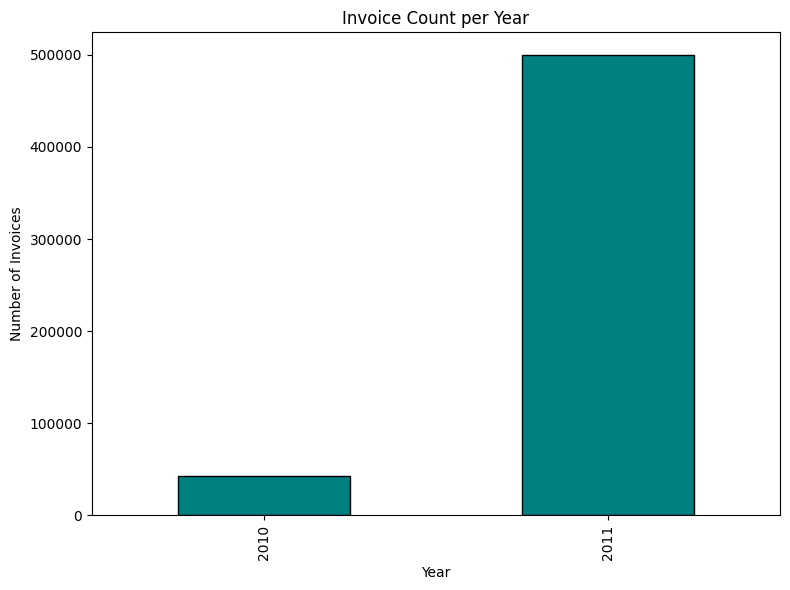

In [28]:
# Date distribution by year

year_counts = df['Year'].value_counts().sort_index()

plt.figure(figsize=(8,6))
year_counts.plot(kind='bar', color='teal',edgecolor='black')
plt.title('Invoice Count per Year')
plt.xlabel('Year')
plt.ylabel('Number of Invoices')
plt.tight_layout()
plt.show()

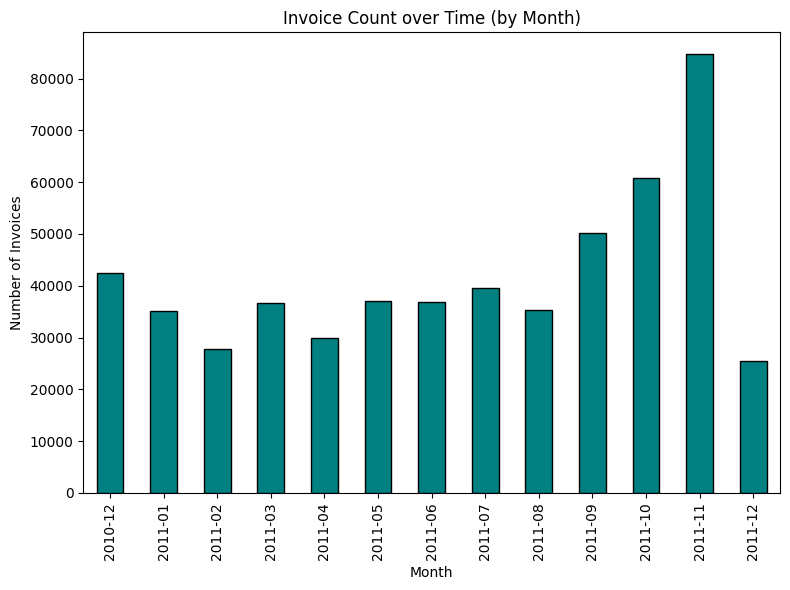

In [29]:
# Distribución de Invoices por Mes
month_counts  = df.groupby('Month').size()

plt.figure(figsize=(8,6))
month_counts.plot(kind='bar', color='teal',edgecolor='black')
plt.title('Invoice Count over Time (by Month)')
plt.xlabel('Month')
plt.ylabel('Number of Invoices')
plt.tight_layout()
plt.show()

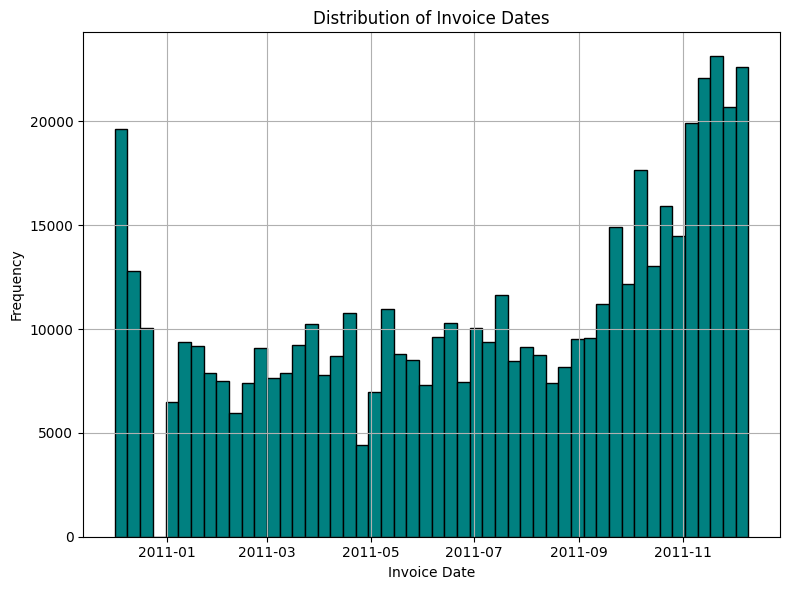

In [30]:
# Date histogram

plt.figure(figsize=(8,6))
df['InvoiceDate'].dropna().hist(bins=50, color='teal', edgecolor='black')
plt.title('Distribution of Invoice Dates')
plt.xlabel('Invoice Date')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

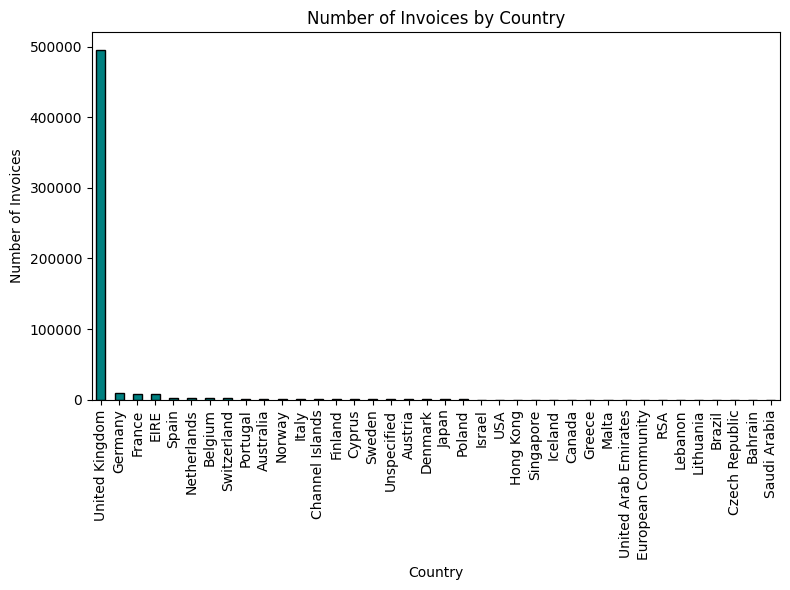

In [33]:
# Plot Value Counts for Country

plt.figure(figsize=(8,6))
df['Country'].value_counts().plot(kind='bar', color='teal', edgecolor='black')
plt.title('Number of Invoices by Country')
plt.xlabel('Country')
plt.ylabel('Number of Invoices')
plt.tight_layout()
plt.show()

In [37]:
# Explore Quantity and UnitPrice outliers

# Row with Highest Quantity
print('---Row with Highest Quantity---')
row_max_qty = df[df['Quantity'] == df['Quantity'].max()]
display(row_max_qty)

# Row with Lowest Quantity
print('---Row with Lowest Quantity---')
row_min_qty = df[df['Quantity'] == df['Quantity'].min()]
display(row_min_qty)

# Row with Highest UnitPrice
print('---Row with Highest UnitPrice---')
row_max_price = df[df['UnitPrice'] == df['UnitPrice'].max()]
display(row_max_price)

---Row with Highest Quantity---


,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month
540421,540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,2011,2011-12


---Row with Lowest Quantity---


,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month
540422,540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,2011,2011-12


---Row with Highest UnitPrice---


,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month
222681,222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.0,15098.0,United Kingdom,2011,2011-06


In [38]:
# Top 10 Exremes in Quantity and UnitPrice
print('---Top 10 Highest Quantity---')
top_10_qty = df.nlargest(10, 'Quantity')
display(top_10_qty)

# Top 10 Lowest Quantity
print('\n---Top 10 Lowest Quantity---')
top_10_low_qty = df.nsmallest(10, 'Quantity')
display(top_10_low_qty)

# Top 10 Highest UnitPrice
print('\n---Top 10 Highest UnitPrice---')
top_10_price = df.nlargest(10, 'UnitPrice')
display(top_10_price)

---Top 10 Highest Quantity---


,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month
540421,540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,2011,2011-12
61619,61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011,2011-01
502122,502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom,2011,2011-11
74614,74614,542504,37413,NaN,5568,2011-01-28 12:03:00,0.00,NaN,United Kingdom,2011,2011-01
421632,421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom,2011,2011-10
206121,206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom,2011,2011-05
220843,220843,556231,85123A,?,4000,2011-06-09 15:04:00,0.00,NaN,United Kingdom,2011,2011-06
97432,97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.82,18087.0,United Kingdom,2011,2011-02
270885,270885,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,2011-07-19 17:04:00,0.06,14609.0,United Kingdom,2011,2011-07
52711,52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749.0,United Kingdom,2011,2011-01



---Top 10 Lowest Quantity---


,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month
540422,540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,2011,2011-12
61624,61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,2011,2011-01
225529,225529,556690,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.00,NaN,United Kingdom,2011,2011-06
225530,225530,556691,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.00,NaN,United Kingdom,2011,2011-06
4287,4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom,2010,2010-12
225528,225528,556687,23003,Printing smudges/thrown away,-9058,2011-06-14 10:36:00,0.00,NaN,United Kingdom,2011,2011-06
115818,115818,546152,72140F,throw away,-5368,2011-03-09 17:25:00,0.00,NaN,United Kingdom,2011,2011-03
431381,431381,573596,79323W,"Unsaleable, destroyed.",-4830,2011-10-31 15:17:00,0.00,NaN,United Kingdom,2011,2011-10
341601,341601,566768,16045,NaN,-3667,2011-09-14 17:53:00,0.00,NaN,United Kingdom,2011,2011-09
323458,323458,565304,16259,NaN,-3167,2011-09-02 12:18:00,0.00,NaN,United Kingdom,2011,2011-09



---Top 10 Highest UnitPrice---


,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month
222681,222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom,2011,2011-06
524602,524602,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46,NaN,United Kingdom,2011,2011-12
43702,43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02,NaN,United Kingdom,2011,2011-01
43703,43703,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16453.71,NaN,United Kingdom,2011,2011-01
15016,15016,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,NaN,United Kingdom,2010,2010-12
15017,15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom,2010,2010-12
16356,16356,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom,2010,2010-12
16232,16232,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34:00,13474.79,NaN,United Kingdom,2010,2010-12
524601,524601,C580604,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:35:00,11586.50,NaN,United Kingdom,2011,2011-12
299982,299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom,2011,2011-08


### **Clean Dataset**

**Clean by using 4 rules**
1. Focus on transactions that generated sales, remove all rows where UnitPrice is lower than 0
2. Eliminate returns, remove all rows where Quantity is lower than 0
3. Eliminate stock codes that are not products (AMAZONFEE, BANK CHARGES, etc)
4. Elimiante rows with no Customer ID. Almost all rows with no Customer ID have inconsistencies

In [40]:
# Create cleaned Dataset using 4 rules above

df_clean = df.copy()

#RULE 1: Focus on transactions that generated sales, remove all rows where UnitPrice is lower than 0
df_clean = df_clean[df_clean['UnitPrice'] > 0]
#RULE 2: Eliminate returns, remove all rows where Quantity is lower than 0
df_clean = df_clean[df_clean['Quantity'] > 0]
#RULE 3: Eliminate stock codes that are not products (AMAZONFEE, BANK CHARGES, etc)
non_product_codes = ['AMAZONFEE', 'BANK CHARGES', 'POSTAGE', 'DOT', 'CRUK Commission', 'MISSING']
df_clean = df_clean[~df_clean['StockCode'].isin(non_product_codes)]
#RULE 4: Elimiante rows with no Customer ID. Almost all rows with no Customer ID have inconsistencies
df_clean = df_clean.dropna(subset=['CustomerID'])

print(f"Original Dimensions: {df.shape}")
print(f"Cleaned Dimensions: {df_clean.shape}")
print(f"Rows Removed: {df.shape[0] - df_clean.shape[0]}")

Original Dimensions: (541909, 11)
Cleaned Dimensions: (397856, 11)
Rows Removed: 144053


### **Distributions with Clean Dataset**

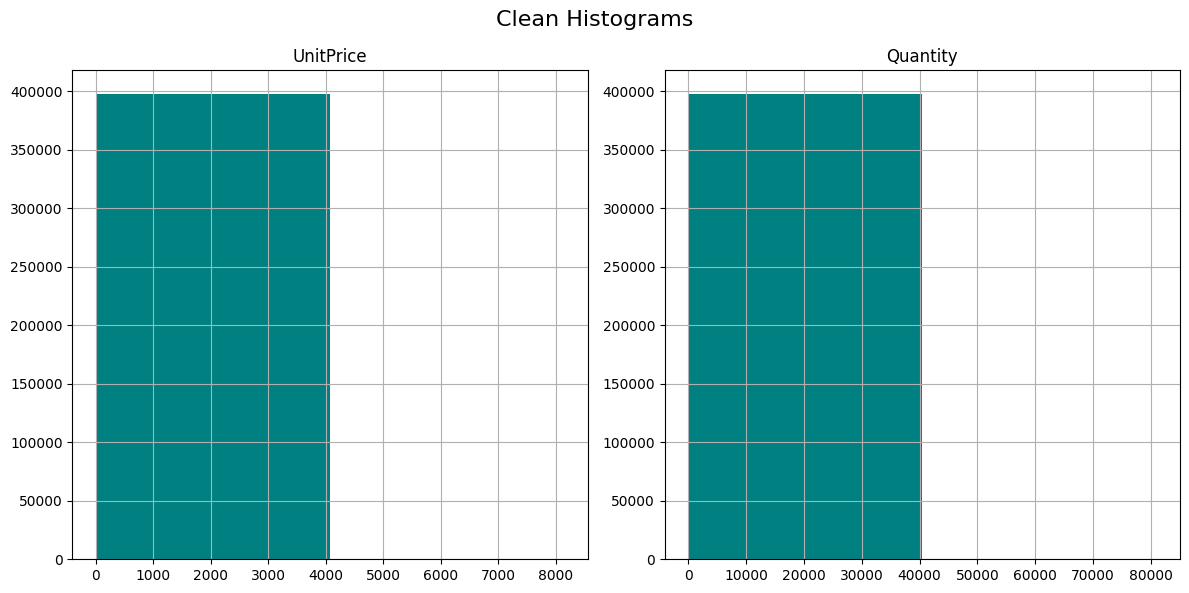

In [44]:
# Plotting histograms for numeric columns from the clean dataset

numeric_cols_clean = ["UnitPrice", "Quantity"]
df_clean[numeric_cols_clean].hist(bins=2, color='teal',figsize=(12,6))
plt.suptitle('Clean Histograms', fontsize=16)
plt.tight_layout()
plt.show()

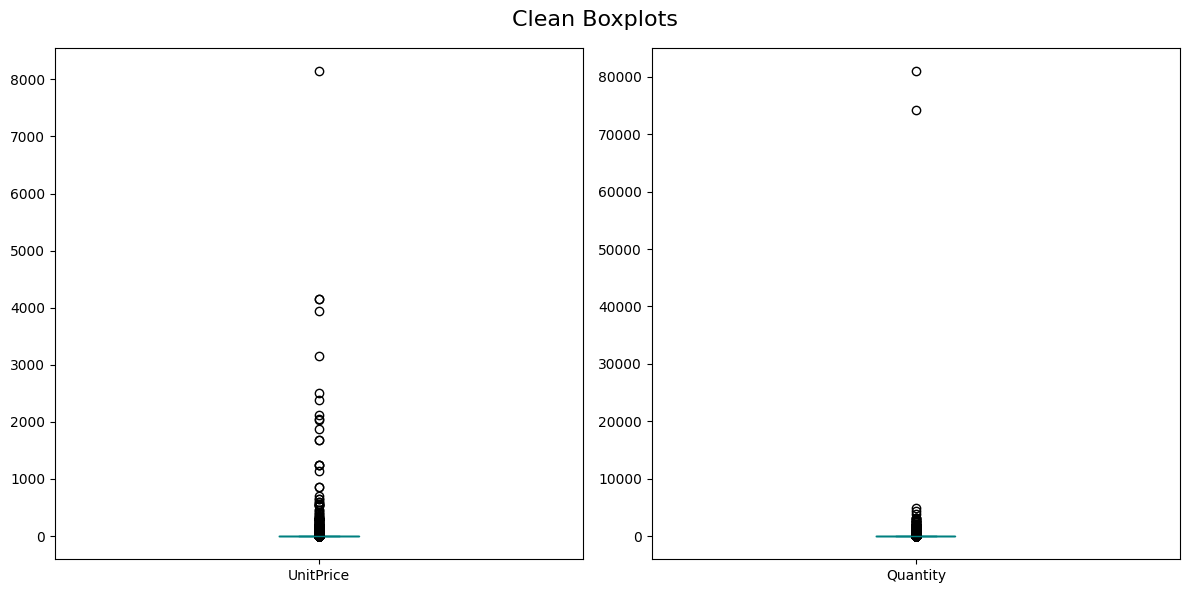

In [45]:
# Boxplots with Clean Dataset
df_clean[numeric_cols_clean].plot(kind='box',subplots=True, layout=(1,2), figsize=(12,6), color='teal')
plt.suptitle('Clean Boxplots', fontsize=16)
plt.tight_layout()
plt.show()

In [47]:
df_clean.describe()

,index,Quantity,InvoiceDate,UnitPrice,CustomerID,Year
count,397856.000000,397856.000000,397856,397856.000000,397856.000000,397856.000000
mean,278456.809544,12.989081,2011-07-10 23:34:46.485613056,3.086366,15294.482064,2010.934258
min,0.000000,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,2010.000000
25%,148328.750000,2.000000,2011-04-07 11:12:00,1.250000,13969.000000,2011.000000
50%,284883.500000,6.000000,2011-07-31 14:19:00,1.950000,15159.000000,2011.000000
75%,410070.250000,12.000000,2011-10-20 14:33:00,3.750000,16795.000000,2011.000000
max,541908.000000,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,2011.000000
std,152770.651417,179.338057,NaN,21.336223,1713.169291,0.247832


### **Distribution of 'UnitPrice' and 'Quantity'**

Both 'UnitPrice' and 'Quantity' present highly right-skewed distributions, which is expected in retail transaction data.

Extreme values represent bulk purchases or high-value items and not necessarily data errors. Some returns where identified however and hence removed from the dataset.

For modeling purposes, logarithmic transofrmations and percentile capping will be considered instead of removing more outlier observations. The normalziation ruiles applied above are the only ones implemented to normalize the dataset.

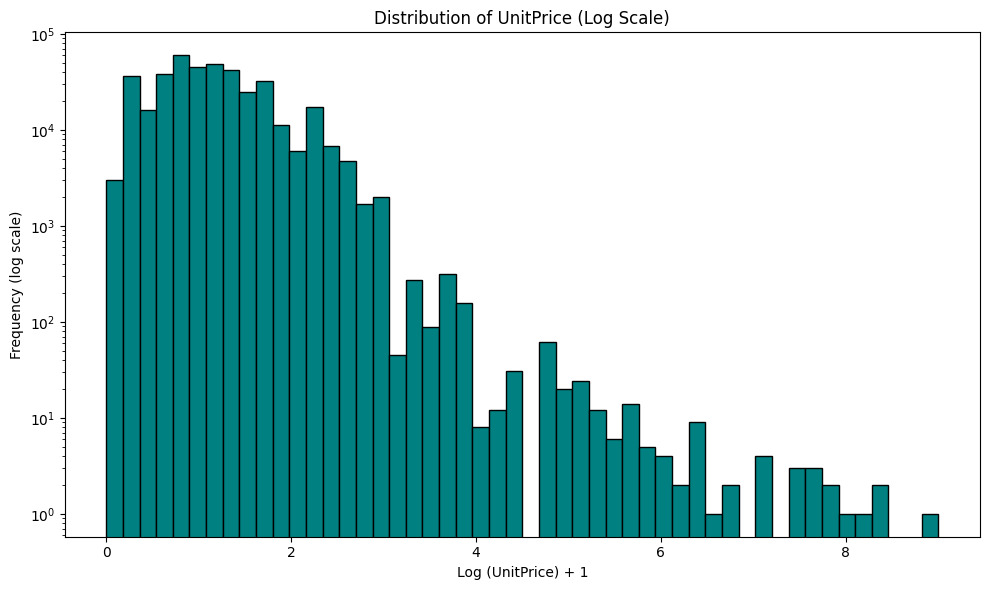

In [ ]:
# Histogram for UnitPrice with log scale

plt.figure(figsize=(10,6))
plt.hist(np.log1p(df_clean['UnitPrice']), bins=50, color='teal', edgecolor='black', log=True)
plt.title('Distribution of UnitPrice (Log Scale)')
plt.xlabel('Log (UnitPrice) + 1')
plt.ylabel('Frequency (log scale)')
plt.tight_layout()
plt.show()

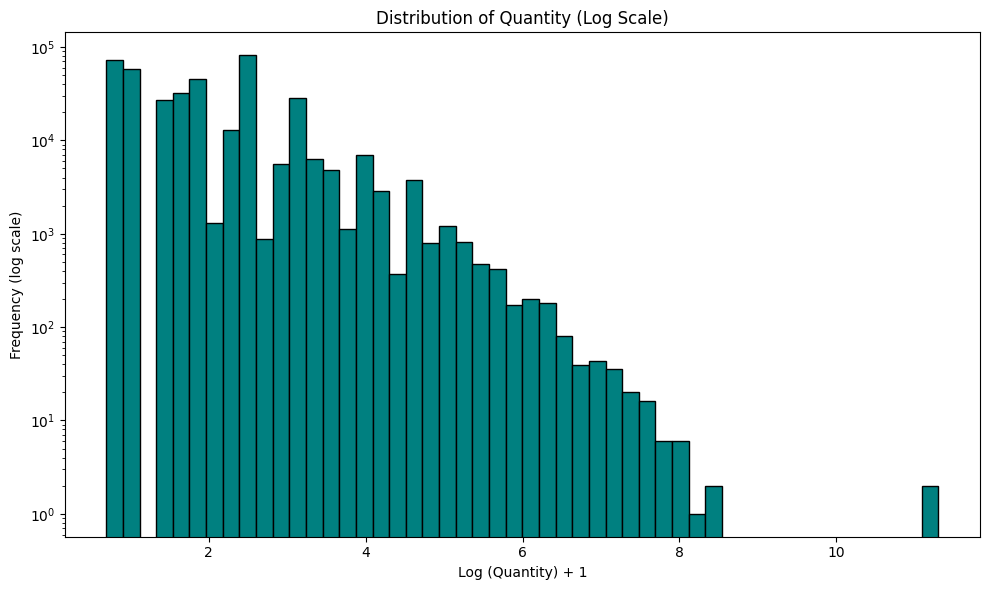

In [54]:
# Histogram for Quantity with Log scale
plt.figure(figsize=(10,6))
plt.hist(np.log1p(df_clean['Quantity']), bins=50, color='teal', edgecolor='black', log=True)
plt.title('Distribution of Quantity (Log Scale)')
plt.xlabel('Log (Quantity) + 1')
plt.ylabel('Frequency (log scale)')
plt.tight_layout()
plt.show()

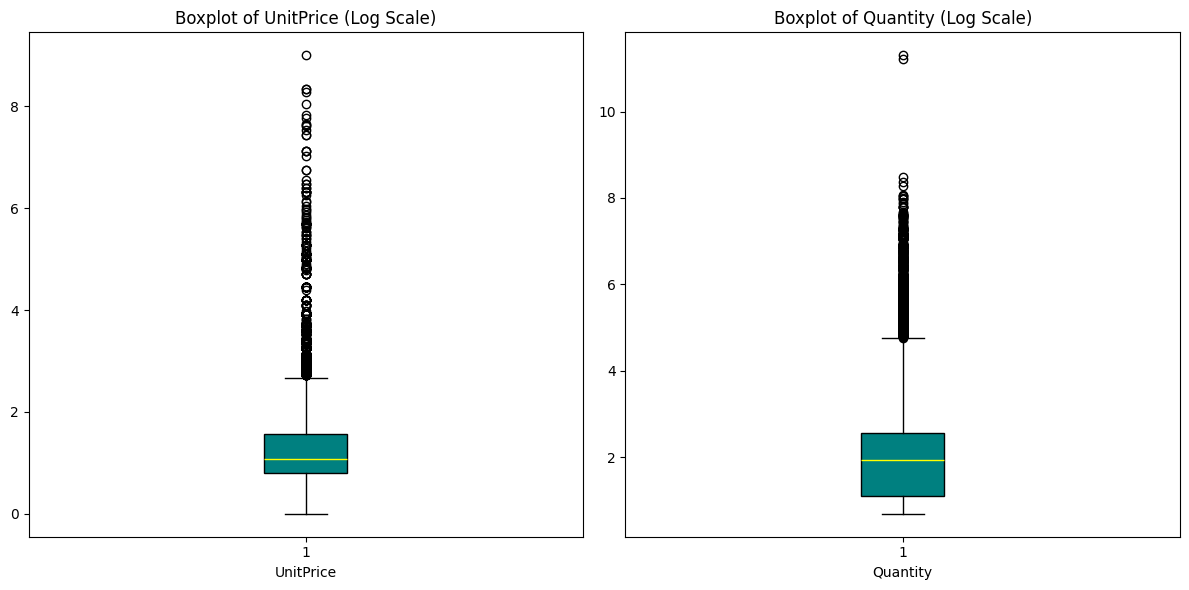

In [55]:
# Boxpolots with Log Scale for Cleaned Data for UnitPrice and Quantity
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.boxplot(np.log1p(df_clean['UnitPrice']), vert=True, patch_artist=True,
            boxprops=dict(facecolor='teal', color='black'),
            medianprops=dict(color='yellow'))
plt.title('Boxplot of UnitPrice (Log Scale)')
plt.xlabel('UnitPrice')
plt.subplot(1, 2, 2)
plt.boxplot(np.log1p(df_clean['Quantity']), vert=True, patch_artist=True,
            boxprops=dict(facecolor='teal', color='black'),
            medianprops=dict(color='yellow'))
plt.title('Boxplot of Quantity (Log Scale)')
plt.xlabel('Quantity')
plt.tight_layout()
plt.show()